In [1]:
#Librerias a cargar
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings('ignore')

import missingno as ms

from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2
import analisis_modelos as pf
import inspect
from IPython.display import Markdown, display

import analisis_modelos as pf

In [2]:
#Carga de los conjuntos de datos resultantes de la Parte 1
conjunto_datos = pd.read_csv('ansiedad2020_modelo.csv',index_col= 1)
conjunto_datos = conjunto_datos.drop('Unnamed: 0',axis=1)

In [3]:
conjunto_datos.head()

,tipo_municipio,situacion_laboral,tipo_hogar,salario_neto,comunidad_autonoma,edad,estado_civil,nivel_estudios,altura,peso,actividad_empresa,apoyosocial_interes,frecuencia_consumocarbohidratos,hemorroides,osteoporosis,cantidad_consultageneral4sem,ansiedad_12meses,ansiedad
IDENTHOGAR,,,,,,,,,,,,,,,,,,
2500011,1.0,0.000000,0.387387,1.000000,0.918919,0.597097,0.527027,0.688188,0.772773,0.535536,0.632633,0.0,0.558058,0.524024,0.523524,0.0,1.0,2
2500021,1.0,0.681682,0.890891,1.000000,0.918919,0.964965,0.848849,0.591091,0.985986,0.977978,0.000000,0.0,0.558058,1.000000,0.000000,0.0,1.0,2
2500031,1.0,0.000000,0.000000,0.400901,0.918919,0.201702,0.527027,0.688188,0.740741,0.691191,0.675676,0.0,0.558058,0.000000,0.523524,0.0,1.0,2
2500061,1.0,0.000000,0.624124,1.000000,0.918919,0.289790,0.527027,1.000000,0.363864,0.145145,0.708709,0.0,0.000000,0.524024,0.523524,0.0,1.0,2
2500071,1.0,0.000000,0.624124,1.000000,0.918919,0.251251,0.527027,0.193193,0.564064,0.535536,0.620120,0.0,0.000000,0.524024,0.523524,0.0,1.0,2


In [4]:
#Cambiamos etiquetas a 0 y 1 (clasificación binaria)
conjunto_datos['ansiedad'] = np.where((conjunto_datos['ansiedad'] == 2),0,1)

In [5]:
conjunto_datos.head()

,tipo_municipio,situacion_laboral,tipo_hogar,salario_neto,comunidad_autonoma,edad,estado_civil,nivel_estudios,altura,peso,actividad_empresa,apoyosocial_interes,frecuencia_consumocarbohidratos,hemorroides,osteoporosis,cantidad_consultageneral4sem,ansiedad_12meses,ansiedad
IDENTHOGAR,,,,,,,,,,,,,,,,,,
2500011,1.0,0.000000,0.387387,1.000000,0.918919,0.597097,0.527027,0.688188,0.772773,0.535536,0.632633,0.0,0.558058,0.524024,0.523524,0.0,1.0,0
2500021,1.0,0.681682,0.890891,1.000000,0.918919,0.964965,0.848849,0.591091,0.985986,0.977978,0.000000,0.0,0.558058,1.000000,0.000000,0.0,1.0,0
2500031,1.0,0.000000,0.000000,0.400901,0.918919,0.201702,0.527027,0.688188,0.740741,0.691191,0.675676,0.0,0.558058,0.000000,0.523524,0.0,1.0,0
2500061,1.0,0.000000,0.624124,1.000000,0.918919,0.289790,0.527027,1.000000,0.363864,0.145145,0.708709,0.0,0.000000,0.524024,0.523524,0.0,1.0,0
2500071,1.0,0.000000,0.624124,1.000000,0.918919,0.251251,0.527027,0.193193,0.564064,0.535536,0.620120,0.0,0.000000,0.524024,0.523524,0.0,1.0,0


In [6]:
#Creamos los modelos de entrenamiento y test
X = conjunto_datos.drop('ansiedad', axis=1)
y = conjunto_datos.ansiedad

In [7]:
#Ojo con el desbalanceo de la variable objetivo
print(y.value_counts())

0    20279
1     1793
Name: ansiedad, dtype: int64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.20, 
                                                    random_state=123, 
                                                    stratify= y)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17657, 17)
(4415, 17)
(17657,)
(4415,)


In [10]:
target_count = y.value_counts()

Clase 0: target_count[0]
Clase 1: target_count[1]
Proportion: 11.31 : 1


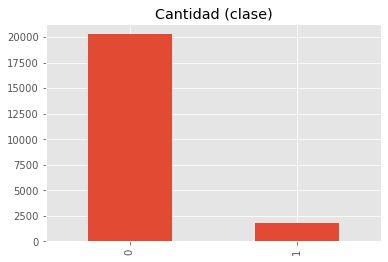

In [11]:
print('Clase 0:', 'target_count[0]')
print('Clase 1:', 'target_count[1]')
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Cantidad (clase)');

# PRUEBA 1

In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(min_samples_split=20, random_state=99)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión: %.2f%%" % (accuracy * 100.0))

Precisión: 100.00%


Confusion matrix:
 [[4056    0]
 [   0  359]]


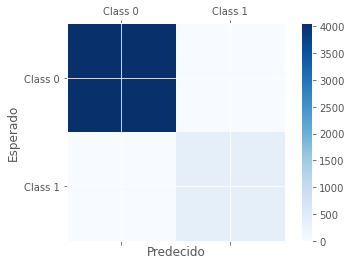

In [13]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predecido')
plt.ylabel('Esperado')
plt.show()

# PRUEBA 2

(KMeans + regresion Logistica)

In [14]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [15]:
k_range = range(2,16)

cal_har_score= []
inertia = []
sil_score = []

for k in k_range:
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(X_train)

    preds = pd.Series(model.predict(X_train))
    cal_har_score.append(metrics.calinski_harabasz_score(X_train,preds))
    sil_score.append(metrics.silhouette_score(X_train, preds, 
                                              random_state=123))

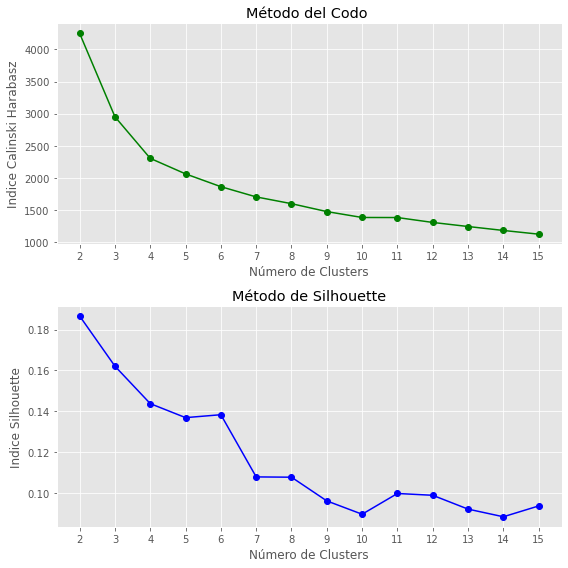

In [16]:
fig,(ax1,ax2) = plt.subplots(figsize=(8,8),nrows=2)

ax1.plot(k_range, cal_har_score, '-o', color='green')
ax1.set_xlabel('Número de Clusters')
ax1.set_ylabel('Indice Calinski Harabasz')
ax1.set_xticks(k_range)
ax1.set_title('Método del Codo ')

ax2.plot(k_range, sil_score, '-o', color='blue')
ax2.set_xlabel('Número de Clusters')
ax2.set_ylabel('Indice Silhouette')
ax2.set_title('Método de Silhouette')
ax2.set_xticks(k_range)
fig.tight_layout()

In [17]:
k_clusters = 5
k_model = KMeans(k_clusters, random_state=123)
k_model.fit(X_train)

kmeans_train_preds = k_model.predict(X_train)
kmeans_train = pd.Series(kmeans_train_preds, index=X_train.index, 
                         name='Cluster')

kmeans_test_preds = k_model.predict(X_test)
kmeans_test = pd.Series(kmeans_test_preds, index=X_test.index, 
                        name='Cluster')

In [18]:
X_train_final = pd.concat([X_train, kmeans_train], axis=1)
X_test_final = pd.concat([X_test, kmeans_test], axis=1)

In [19]:
func = inspect.getsource(pf.make_classification_report)

In [20]:
func = inspect.getsource(pf.plot_confusion_matrix)

In [21]:
func = inspect.getsource(pf.plot_roc_curve)

In [22]:
func = inspect.getsource(pf.plot_top_features)

In [23]:
func = inspect.getsource(pf.evaluate_model)

In [24]:
from sklearn.metrics import fbeta_score, make_scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

In [25]:
from sklearn.linear_model import LogisticRegressionCV

In [26]:
logreg_clf = LogisticRegressionCV(class_weight='balanced', 
                                  random_state=123, 
                                  scoring=f2_scorer, 
                                  n_jobs=-1, cv=10)


logreg_base = logreg_clf.fit(X_train_final, y_train)

__________________________________________________________________
Reporte para el Clasificador: 
	Regresión Logística
__________________________________________________________________


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4056
           1       1.00      1.00      1.00       359

    accuracy                           1.00      4415
   macro avg       1.00      1.00      1.00      4415
weighted avg       1.00      1.00      1.00      4415

__________________________________________________________________


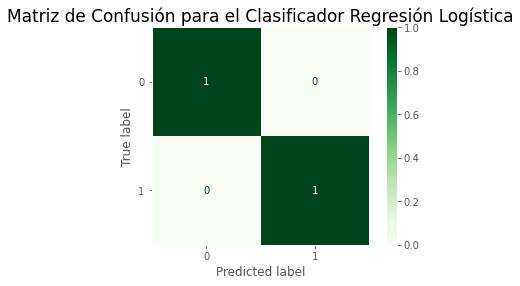

__________________________________________________________________


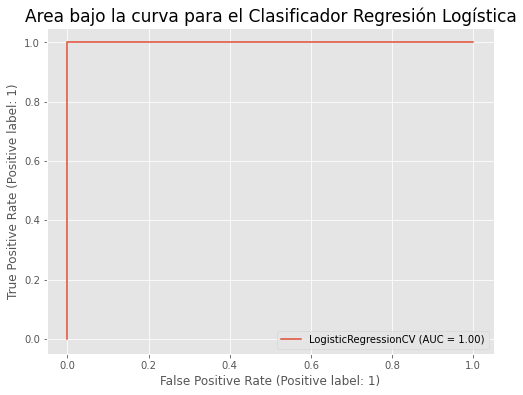

In [27]:
pf.evaluate_model(logreg_base, X_train_final, X_test_final, y_test, 
               title='Regresión Logística')